<a href="https://colab.research.google.com/github/LailaDuffy/Python/blob/main/IT_ticket_summary_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Titanic dataset into a Pandas DataFrame.
data = pd.read_csv('/content/ticket_export_27012025.csv')
df_data = pd.DataFrame(data)

# Display the first few rows to get an overview of the data structure.
df_data


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Ticket Number,Summary,Description,Assigned To,Category,Closed On,Created On,Created By,Due On,Priority,Organization Name,Status,Time Spent,Time To Resolve,Organization Host,Link to Ticket,Tips,Iestāde/nodaļa
0,6,Dators neslēdzas iekšā,Nevar ieslēgt datoru,Intars Umbraško,Darba stacija/PC,1/15/2021 1:59 pm UTC,1/4/2021 6:40 am UTC,Renārs Biezais,NaN,high,Gulbenes novada pašvaldība,closed,300,16279.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/6,Incidents,Grāmatvedības nodaļa
1,7,Darba staciju pārcelšana Grāmatvedības nodaļai,Pārcelt darba stacijas no kabinetiem uz 2. stā...,Intars Umbraško,Darba stacija/PC,11/30/2021 1:28 pm UTC,1/4/2021 7:11 am UTC,Renārs Biezais,1/6/2021 3:00 pm UTC,low,Gulbenes novada pašvaldība,closed,0,475577.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/7,Izmaiņas,Grāmatvedības nodaļa
2,9,IZM datoru instalācija,IZM piešķirto portatīvo datoru instalācija sko...,Intars Umbraško,Darba stacija/PC,1/11/2021 2:17 pm UTC,1/4/2021 9:28 am UTC,Renārs Biezais,1/31/2021 3:00 pm UTC,medium,Gulbenes novada pašvaldība,closed,1800,10369.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/9,Jauns HW/SW,Izglītības pārvalde
3,10,WiFi4EU,Publisko WiFi punktu uzstādīšana,Ģirts Vilde,Tīkls,8/6/2021 5:25 pm UTC,1/4/2021 9:50 am UTC,Renārs Biezais,1/15/2021 3:00 pm UTC,medium,Gulbenes novada pašvaldība,closed,0,308614.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/10,Jauns HW/SW,Informācijas tehnoloģiju kompetences centrs
4,12,Inārai nestrādā otrs monitors.,Dators nerāda bildi uz otra monitora (Philips),Renārs Biezais,Darba stacija/PC,1/7/2021 1:09 pm UTC,1/4/2021 11:51 am UTC,Renārs Biezais,4/1/2021 2:00 pm UTC,medium,Gulbenes novada pašvaldība,closed,30,4398.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/12,Incidents,Kancelejas nodaļa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15069,15090,Tīkla printera pievienošana. Edīte Siļķēna.,Portatīvajam vēlas pievienot printeri.,Daumants Lūkins,Darba stacija/PC,1/27/2025 8:52 am UTC,1/27/2025 8:51 am UTC,Daumants Lūkins,NaN,medium,Gulbenes novada pašvaldība,closed,0,0.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/1...,Izmaiņas,Stāmerienas pils
15070,15091,Rūtera atjaunošana. SAC Dzērves.,Lejupielādēts atjauninājums uz 7.12. Uzliktu s...,Daumants Lūkins,Tīkls,NaN,1/27/2025 8:58 am UTC,Daumants Lūkins,NaN,medium,Gulbenes novada pašvaldība,open,0,NaN,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/open/15091,Izmaiņas,"SAC ""Dzērves"""
15071,15092,Jauns mobilais pieslēgums. Brīvprātīgo projekts.,Ellada Rizaeva. Eiropas solidaritātes korpusa ...,Daumants Lūkins,"Balss sakari (mob., IP., ...)",1/27/2025 12:03 pm UTC,1/27/2025 9:44 am UTC,Daumants Lūkins,NaN,medium,Gulbenes novada pašvaldība,closed,0,139.0,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/closed/1...,Jauns HW/SW,Izglītības pārvalde
15072,15093,Organizēt Gemini apmācības darbiniekiem,"Pēc izpilddirektores lūguma, jānoorganizē apmā...",Laila Dafi,Google Workspace,NaN,1/27/2025 12:30 pm UTC,Laila Dafi,NaN,medium,Gulbenes novada pašvaldība,open,0,NaN,Gulbenes novada pašvaldība,https://spiceworks.gulbene.lv/tickets/open/15093,Konsultācija,Pašvaldības administrācija


In [ ]:
# Convert the "Created On" column to a datetime object and drop timezone info.
df_data['Created On'] = pd.to_datetime(df_data['Created On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce').dt.tz_localize(None)

# Define the date range as timezone-naive timestamps.
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2024-12-31')

# Filter the data to only include rows where "Created On" is within the specified range.
data_2024 = df_data[(df_data['Created On'] >= start_date) & (df_data['Created On'] <= end_date)]

# Display the filtered data.
data_2024.head()
data_2024.shape

(3112, 18)

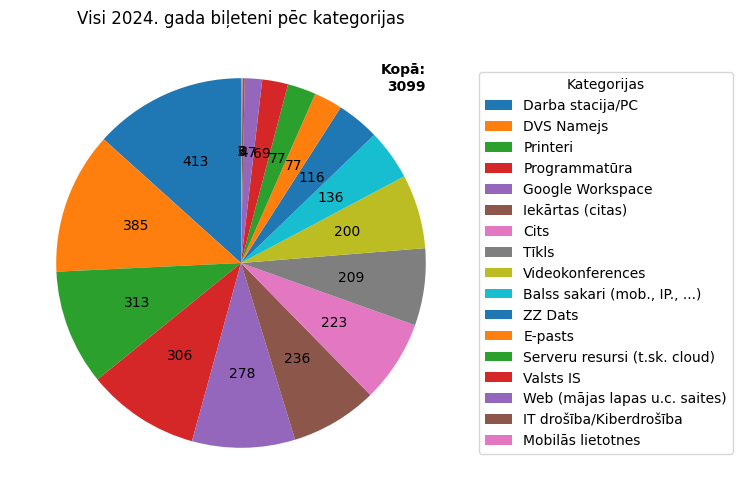

In [ ]:
# Count occurrences of each category.
category_counts = data_2024['Category'].value_counts()

# Calculate total number of tickets.
total_tickets = category_counts.sum()

# Plot a pie chart without labels.
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    category_counts,
    startangle=90,
    autopct=lambda p: f'{int(p/100 * sum(category_counts))}')

# Add a legend next to the pie chart.
plt.legend(wedges, category_counts.index, title="Kategorijas", loc="center left", bbox_to_anchor=(1, 0.5))

# **Display the total number of tickets in the center of the pie chart.**
plt.text(1, 1, f'Kopā:\n{total_tickets}', ha='right', va='center', fontsize=10, fontweight='bold')

# Add a title.
plt.title('Visi 2024. gada biļeteni pēc kategorijas')

# Display the chart.
plt.show()

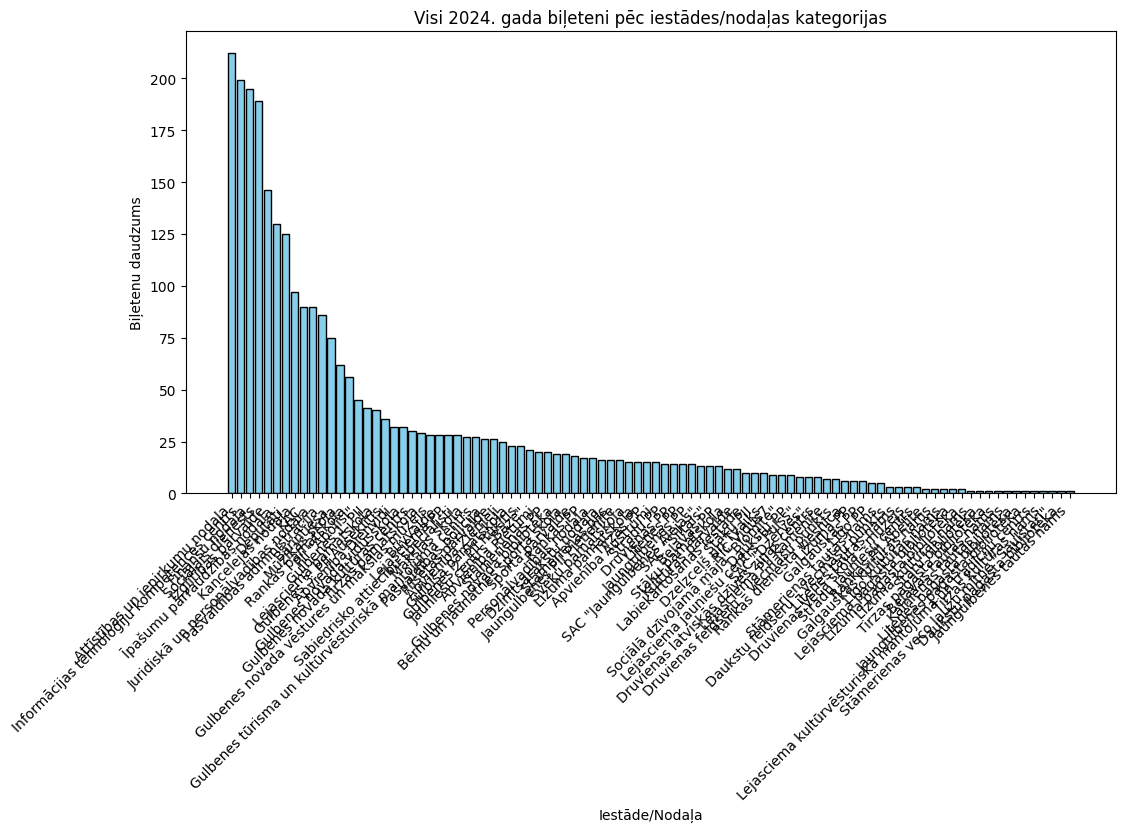

In [ ]:
# Convert the "Created On" column to datetime and filter for 2024.
df_data['Created On'] = pd.to_datetime(df_data['Created On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
df_data_2024 = df_data[(df_data['Created On'] >= '2024-01-01') & (df_data['Created On'] <= '2024-12-31')]

# Count occurrences of each "Iestāde/Nodaļa".
iestade_counts = df_data_2024['Iestāde/nodaļa'].value_counts()

# Calculate total number of tickets.
total_tickets = iestade_counts.sum()

# Create a bar chart.
plt.figure(figsize=(12, 6))
bars = plt.bar(iestade_counts.index, iestade_counts.values, color='skyblue', edgecolor='black')

# Add labels and title.
plt.xlabel("Iestāde/Nodaļa")
plt.ylabel("Biļetenu daudzums")
plt.title("Visi 2024. gada biļeteni pēc iestādes/nodaļas kategorijas")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

# Display the chart.
plt.show()

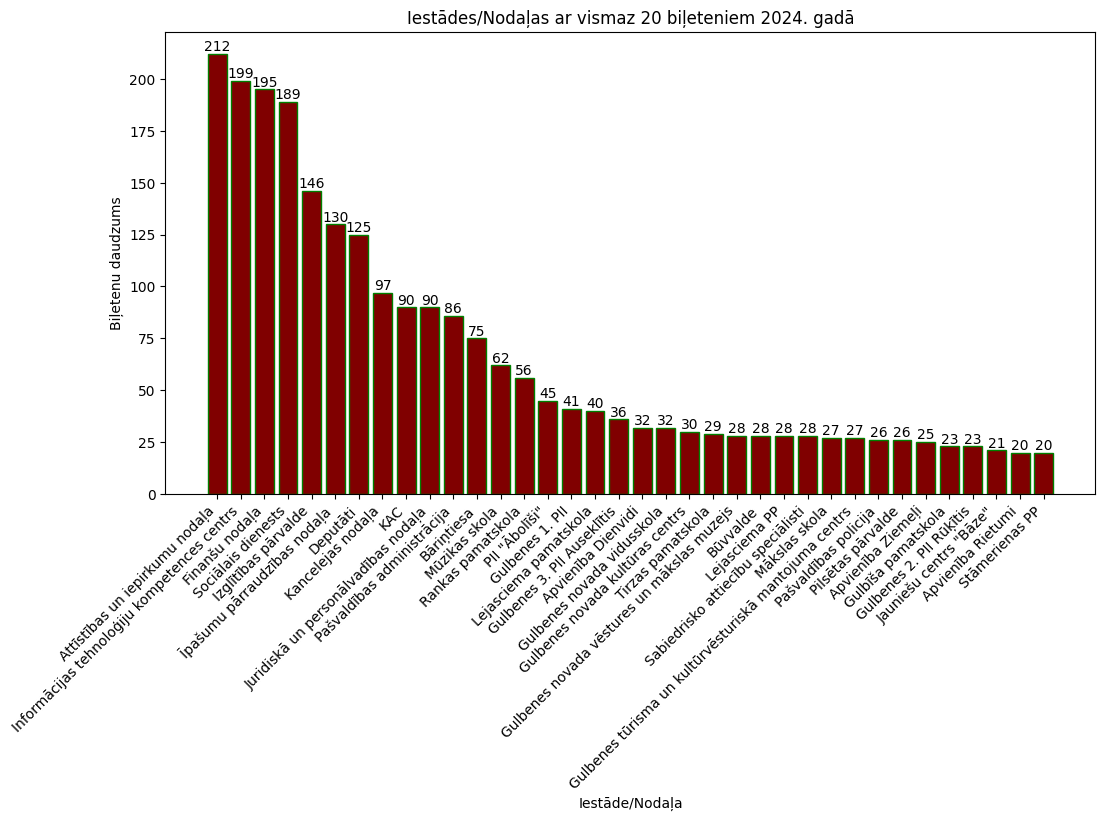

In [ ]:
# Convert the "Created On" column to datetime and filter for 2024.
df_data['Created On'] = pd.to_datetime(df_data['Created On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
df_data_2024 = df_data[(df_data['Created On'] >= '2024-01-01') & (df_data['Created On'] <= '2024-12-31')]

# Count occurrences of each "Iestāde/Nodaļa" and filter those with at least 25 tickets.
iestade_counts = df_data_2024['Iestāde/nodaļa'].value_counts()
iestade_counts = iestade_counts[iestade_counts >= 20]

# Create a bar chart for filtered data.
plt.figure(figsize=(12, 6))
bars = plt.bar(iestade_counts.index, iestade_counts.values, color='maroon', edgecolor='green')

# Add labels to each bar.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=10)

# Add labels and title.
plt.xlabel("Iestāde/Nodaļa")
plt.ylabel("Biļetenu daudzums")
plt.title("Iestādes/Nodaļas ar vismaz 20 biļeteniem 2024. gadā")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

# Display the chart.
plt.show()

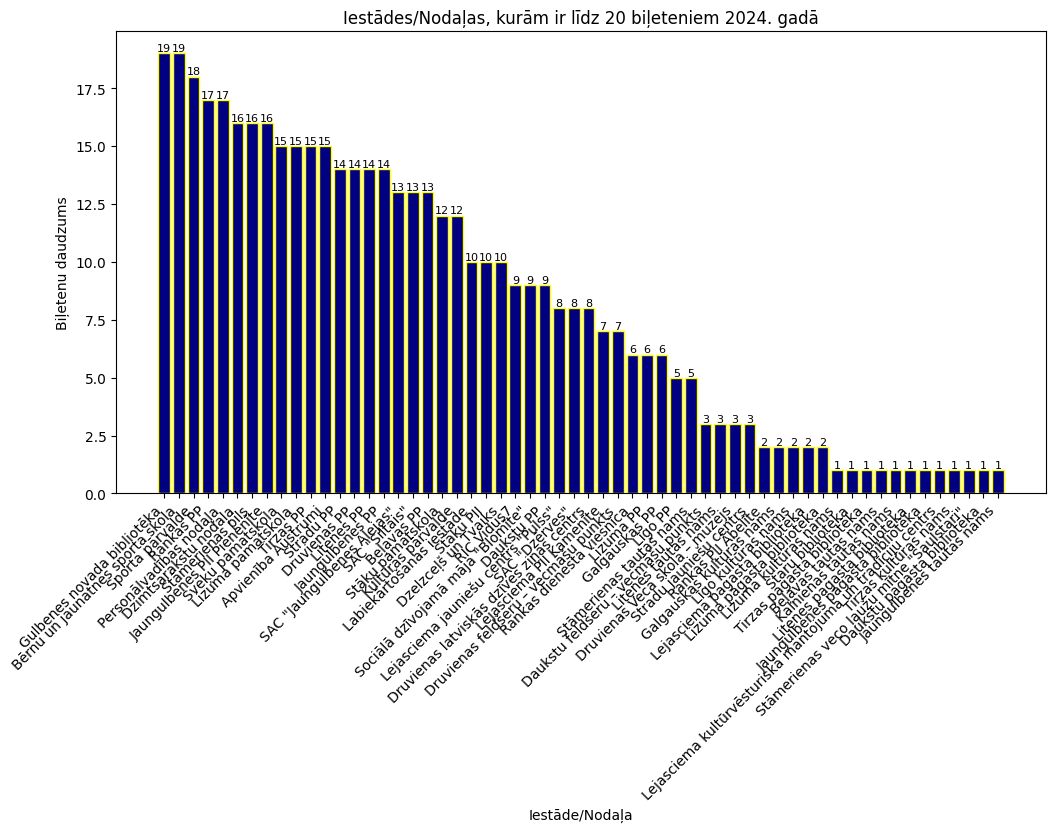

In [ ]:
# Convert the "Created On" column to datetime and filter for 2024.
df_data['Created On'] = pd.to_datetime(df_data['Created On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
df_data_2024 = df_data[(df_data['Created On'] >= '2024-01-01') & (df_data['Created On'] <= '2024-12-31')]

# Count occurrences of each "Iestāde/Nodaļa" and filter those with at least 25 tickets.
iestade_counts = df_data_2024['Iestāde/nodaļa'].value_counts()
iestade_counts = iestade_counts[iestade_counts < 20]

# Create a bar chart for filtered data.
plt.figure(figsize=(12, 6))
bars = plt.bar(iestade_counts.index, iestade_counts.values, color='navy', edgecolor='yellow')

# Add labels to each bar.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom', fontsize=8)

# Add labels and title.
plt.xlabel("Iestāde/Nodaļa")
plt.ylabel("Biļetenu daudzums")
plt.title("Iestādes/Nodaļas, kurām ir līdz 20 biļeteniem 2024. gadā")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

# Display the chart.
plt.show()

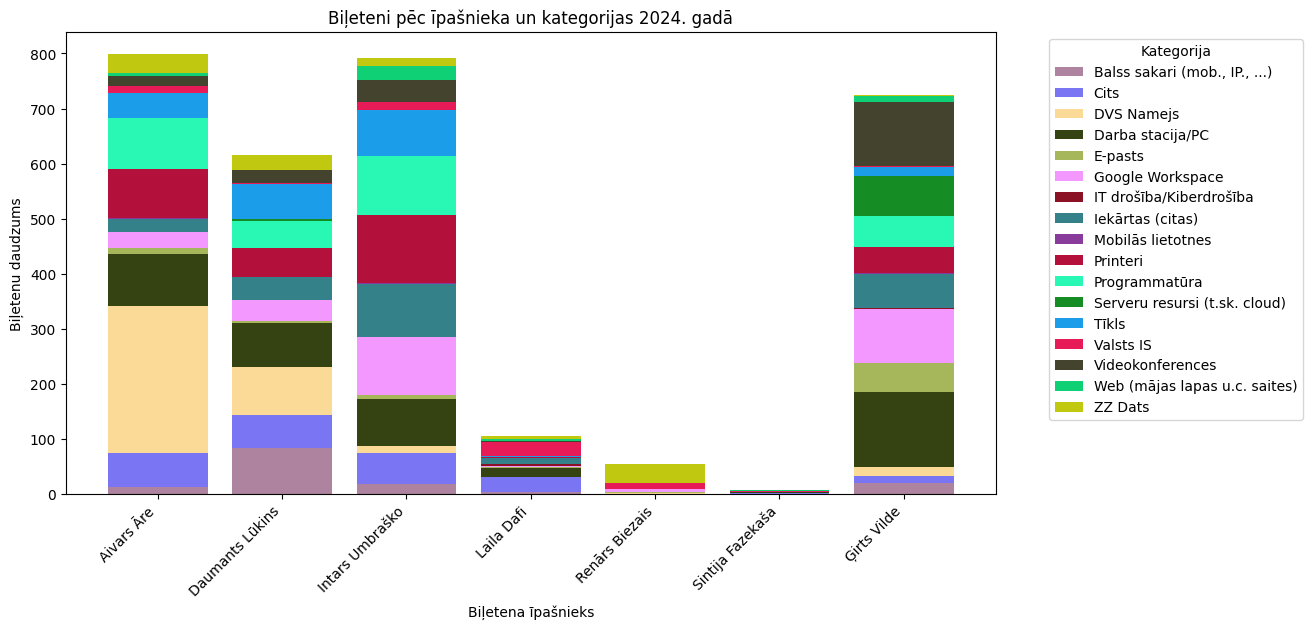

In [ ]:
# Group by "Assigned To" and "Iestāde/nodaļa" to count tickets per institution per person.
grouped_counts = data_2024.groupby(['Assigned To', 'Category']).size().unstack(fill_value=0)

# Generate distinct colors for each "Iestāde/nodaļa".
np.random.seed(120)  # Ensures reproducibility
colors = np.random.rand(len(grouped_counts.columns), 3)  # Generate random colors for each institution

# Create the stacked bar chart.
plt.figure(figsize=(12, 6))

# Plot each institution as a stacked section.
bottom_stack = np.zeros(len(grouped_counts))  # Initialize bottom positions for stacking
for idx, institution in enumerate(grouped_counts.columns):
    plt.bar(grouped_counts.index, grouped_counts[institution], bottom=bottom_stack, color=colors[idx], label=institution)
    bottom_stack += grouped_counts[institution].values  # Update bottom positions

# Add labels and title.
plt.xlabel("Biļetena īpašnieks")
plt.ylabel("Biļetenu daudzums")
plt.title("Biļeteni pēc īpašnieka un kategorijas 2024. gadā")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title="Kategorija", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside

# Display the chart.
plt.show()

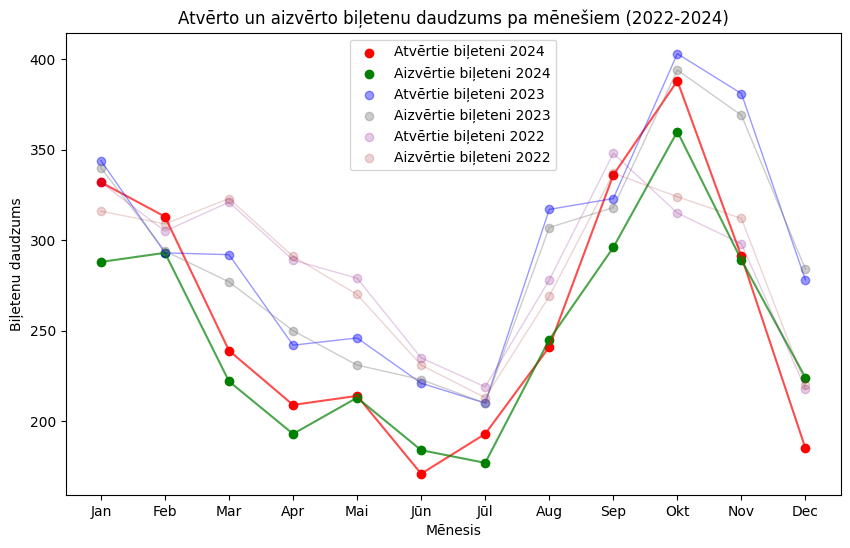

In [ ]:
# Convert the "Created On" and "Closed On" columns to datetime.
df_data['Created On'] = pd.to_datetime(df_data['Created On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')
df_data['Closed On'] = pd.to_datetime(df_data['Closed On'], format='%m/%d/%Y %I:%M %p %Z', errors='coerce')

# Function to filter data for a specific year and count open/closed tickets per month
def get_ticket_counts(df, year):
    df_year = df[(df['Created On'] >= f'{year}-01-01') & (df['Created On'] <= f'{year}-12-31')].copy()
    df_year['Created Month'] = df_year['Created On'].dt.month
    df_year['Closed Month'] = df_year['Closed On'].dt.month
    created_tickets = df_year.groupby('Created Month').size()
    closed_tickets = df_year.groupby('Closed Month').size()
    return created_tickets, closed_tickets

# Get data for 2024, 2023, and 2022
created_2024, closed_2024 = get_ticket_counts(df_data, 2024)
created_2023, closed_2023 = get_ticket_counts(df_data, 2023)
created_2022, closed_2022 = get_ticket_counts(df_data, 2022)

# Prepare month labels
months = ["Jan", "Feb", "Mar", "Apr", "Mai", "Jūn", "Jūl", "Aug", "Sep", "Okt", "Nov", "Dec"]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Plot 2024 (Bold Colors)
plt.scatter(created_2024.index, created_2024.values, color='red', label='Atvērtie biļeteni 2024')
plt.scatter(closed_2024.index, closed_2024.values, color='green', label='Aizvērtie biļeteni 2024')
plt.plot(created_2024.index, created_2024.values, color='red', alpha=0.7, linestyle='-', linewidth=1.5)
plt.plot(closed_2024.index, closed_2024.values, color='green', alpha=0.7, linestyle='-', linewidth=1.5)

# Plot 2023 (Fainter)
plt.scatter(created_2023.index, created_2023.values, color='blue', alpha=0.4, label='Atvērtie biļeteni 2023')
plt.scatter(closed_2023.index, closed_2023.values, color='grey', alpha=0.4, label='Aizvērtie biļeteni 2023')
plt.plot(created_2023.index, created_2023.values, color='blue', alpha=0.4, linestyle='-', linewidth=1)
plt.plot(closed_2023.index, closed_2023.values, color='grey', alpha=0.4, linestyle='-', linewidth=1)

# Plot 2022 (Faintest)
plt.scatter(created_2022.index, created_2022.values, color='purple', alpha=0.2, label='Atvērtie biļeteni 2022')
plt.scatter(closed_2022.index, closed_2022.values, color='brown', alpha=0.2, label='Aizvērtie biļeteni 2022')
plt.plot(created_2022.index, created_2022.values, color='purple', alpha=0.2, linestyle='-', linewidth=1)
plt.plot(closed_2022.index, closed_2022.values, color='brown', alpha=0.2, linestyle='-', linewidth=1)

# Set labels, title, and legend
plt.xticks(ticks=range(1, 13), labels=months)
plt.xlabel("Mēnesis")
plt.ylabel("Biļetenu daudzums")
plt.title("Atvērto un aizvērto biļetenu daudzums pa mēnešiem (2022-2024)")
plt.legend()

# Display the chart
plt.show()